## 1. Import Required Libraries

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

## 2. Load the Dataset

In [ ]:
# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

## 3. Split the Dataset into Training and Testing Sets

In [ ]:
# Split the dataset into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Display

In [ ]:
print("Features (X):\n", X.head())  # Display the first few rows of features
print("\nTarget (y):\n", y[:10])  # Display the first few target values

Features (X):
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter 

## 4. Check for Duplicate Rows in the Features

In [ ]:
duplicates = X.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


## 5. Feature Scaling with StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 6. Feature Selection Using SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top k features using ANOVA F-value
selector = SelectKBest(f_classif, k=10)  # Select top 10 features
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

## 7. Train a k-Nearest Neighbors (kNN) Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

KNeighborsClassifier()

## 8. Make Predictions and Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", confusion_mat)
print("ROC-AUC:", roc_auc)

Accuracy: 0.9736842105263158
Precision: 0.9857142857142858
Recall: 0.971830985915493
F1-Score: 0.9787234042553191
Confusion Matrix:
 [[42  1]
 [ 2 69]]
ROC-AUC: 0.9742875859810023


## 9. Visualize the Confusion Matrix

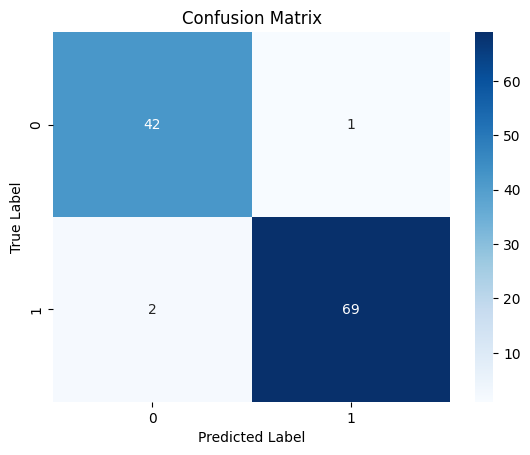

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 10. Plot a Scatter Plot for Feature Analysis

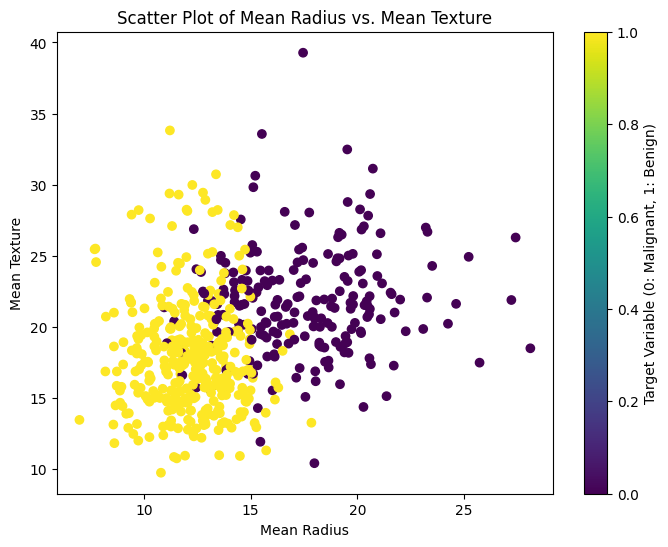

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(X['mean radius'], X['mean texture'], c=y, cmap='viridis')  # Color points by target variable
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Scatter Plot of Mean Radius vs. Mean Texture')
plt.colorbar(label='Target Variable (0: Malignant, 1: Benign)')
plt.show()

## 11. Plot the ROC Curve

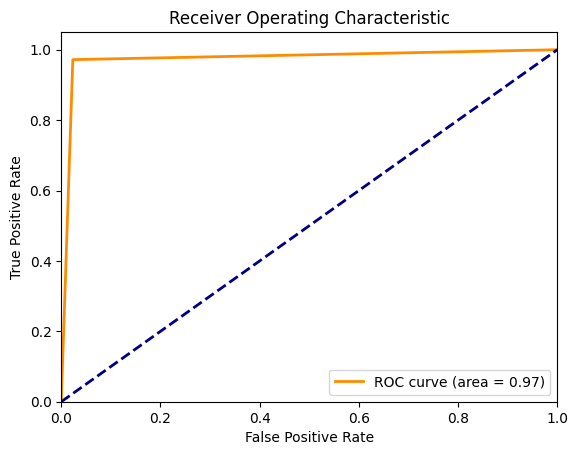

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
